<a href="https://colab.research.google.com/github/Galacticocr/Fraudulentas/blob/main/Ejercicio_2_Tarea_1_Julio_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ████████████████████████████████████████████████████████████
# 1) Instalación de dependencias  🔧
# ------------------------------------------------------------
!pip install -q transformers==4.41.0 torch==2.3.0 pandas tabulate openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 716.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# ████████████████████████████████████████████████████████████
# 2) Configuración de carpetas del proyecto 📁
# ------------------------------------------------------------
import os, pathlib

for carpeta in ("data", "informe"):
    os.makedirs(carpeta, exist_ok=True)

print("Estructura creada en:", pathlib.Path('.').absolute())


Estructura creada en: /content


In [5]:
# ████████████████████████████████████████████████████████████
# 3) Creación/edición de frases de prueba ✏️
#    (edita libremente el bloque 'frases' si lo deseas)
# ------------------------------------------------------------
frases = """¿Cuánto cuesta el café?
Los   espacios  múltiples
NLP vs nlp
Pseudopseudohipoparatiroidismo
I had swum across the river.
"""

with open("data/frases.txt", "w", encoding="utf-8") as fh:
    fh.write(frases)

print("Archivo data/frases.txt listo ✔️")


Archivo data/frases.txt listo ✔️


In [6]:
# ████████████████████████████████████████████████████████████
# 4) Carga de tokenizadores y funciones auxiliares 🤖
# ------------------------------------------------------------
from transformers import AutoTokenizer
import pandas as pd
from tabulate import tabulate

MODELOS = {
    "bert-base-uncased": "BERT (WordPiece)",
    "gpt2": "GPT-2 (BPE)",
    "roberta-base": "RoBERTa (BPE optimizado)"
}

TOKENIZERS = {alias: AutoTokenizer.from_pretrained(alias) for alias in MODELOS}

def procesar(ruta_frases: str) -> pd.DataFrame:
    """Tokeniza cada frase con cada modelo y devuelve un DataFrame detallado."""
    registros = []
    with open(ruta_frases, encoding="utf-8") as fh:
        for frase in fh:
            frase = frase.strip()
            for alias, tk in TOKENIZERS.items():
                ids = tk.encode(frase, add_special_tokens=True)
                tokens = tk.convert_ids_to_tokens(ids)
                registros.append({
                    "Frase": frase,
                    "Modelo": MODELOS[alias],
                    "Tokens": tokens,
                    "IDs": ids,
                    "Longitud": len(ids),
                    "Subpalabras_%": round(
                        sum(tok.startswith("##") for tok in tokens) / len(tokens) * 100, 2
                    )
                })
    return pd.DataFrame(registros)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [7]:
# ████████████████████████████████████████████████████████████
# 5) Ejecución del análisis y vista previa 📊
# ------------------------------------------------------------
df = procesar("data/frases.txt")

# Vista rápida
print(tabulate(df.head(10), headers="keys", tablefmt="github", showindex=False))

# Estadísticas básicas
print("\nLongitud media por modelo:")
print(df.groupby("Modelo")["Longitud"].mean().round(2))


| Frase                          | Modelo                   | Tokens                                                                                                     | IDs                                                                             |   Longitud |   Subpalabras_% |
|--------------------------------|--------------------------|------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|------------|-----------------|
| ¿Cuánto cuesta el café?        | BERT (WordPiece)         | ['[CLS]', '¿', 'cu', '##anto', 'cues', '##ta', 'el', 'cafe', '?', '[SEP]']                                 | [101, 1094, 12731, 21634, 23391, 2696, 3449, 7668, 1029, 102]                   |         10 |           20    |
| ¿Cuánto cuesta el café?        | GPT-2 (BPE)              | ['Â', '¿', 'Cu', 'Ã¡', 'nt', 'o', 'Ġcu', 'esta', 'Ġel', 'ĠcafÃ©', '?']                

In [8]:
# ████████████████████████████████████████████████████████████
# 6) Construcción de tabla comparativa y exportación  📈
# ------------------------------------------------------------
pivot = df.pivot(index="Frase", columns="Modelo", values="Tokens")
display(pivot)                         # Se muestra en Colab

pivot.to_excel("informe/tabla_comparativa.xlsx")
print("Archivo informe/tabla_comparativa.xlsx guardado ✔️")


Modelo,BERT (WordPiece),GPT-2 (BPE),RoBERTa (BPE optimizado)
Frase,,,
I had swum across the river.,"[[CLS], i, had, sw, ##um, across, the, river, ...","[I, Ġhad, Ġsw, um, Ġacross, Ġthe, Ġriver, .]","[<s>, I, Ġhad, Ġsw, um, Ġacross, Ġthe, Ġriver,..."
Los espacios múltiples,"[[CLS], los, es, ##pac, ##ios, multiple, ##s, ...","[Los, Ġ, Ġ, Ġesp, ac, ios, Ġ, Ġm, Ãº, lt, i, p...","[<s>, Los, Ġ, Ġ, Ġesp, ac, ios, Ġ, Ġm, Ãº, lt,..."
NLP vs nlp,"[[CLS], nl, ##p, vs, nl, ##p, [SEP]]","[N, LP, Ġvs, Ġn, lp]","[<s>, N, LP, Ġvs, Ġn, lp, </s>]"
Pseudopseudohipoparatiroidismo,"[[CLS], pseudo, ##pse, ##ud, ##oh, ##ip, ##opa...","[P, se, ud, op, se, udo, hip, op, ar, ati, roi...","[<s>, P, se, ud, op, se, udo, hip, op, ar, ati..."
¿Cuánto cuesta el café?,"[[CLS], ¿, cu, ##anto, cues, ##ta, el, cafe, ?...","[Â, ¿, Cu, Ã¡, nt, o, Ġcu, esta, Ġel, ĠcafÃ©, ?]","[<s>, Â, ¿, Cu, Ã¡, nt, o, Ġcu, esta, Ġel, Ġca..."


Archivo informe/tabla_comparativa.xlsx guardado ✔️


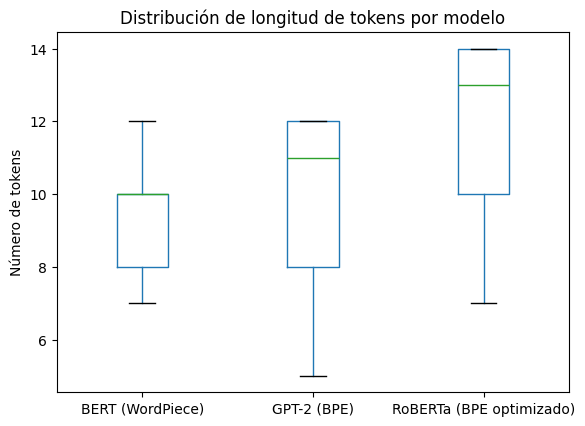

In [10]:
# ████████████████████████████████████████████████████████████
# 7) Histograma de longitudes (opcional) 📉
# ------------------------------------------------------------
import matplotlib.pyplot as plt

df.boxplot(column="Longitud", by="Modelo", grid=False)
plt.suptitle("")  # Limpia el título automático
plt.title("Distribución de longitud de tokens por modelo")
plt.xlabel("")
plt.ylabel("Número de tokens")
plt.show()
